4
0  =  3.91649125627335
1  =  33.993426918148366
2  =  46.66192804275853
3  =  1.881035066776426
4  =  28.543841354178564
5  =  24.1296476086492
6  =  6.3163587190180905
7  =  43.815498740194755
8  =  20.49593050237813
9  =  14.805405721908155
10  =  28.26465326924045
11  =  2.9154860377037837
12  =  47.07509687357168
13  =  20.9787860834072
14  =  33.250760670968084
15  =  33.801343724948886
16  =  13.011427866998519
17  =  32.4046549859621
18  =  23.84071260272776
19  =  0.45087925712613686
20  =  1.030425913826639
21  =  36.113056017842915
22  =  8.385839724817995
23  =  18.210780486042445
24  =  22.612582871197986
25  =  18.74551787168357
26  =  45.7947271947699
27  =  13.05075405483036
28  =  11.879042287954753
29  =  34.65105647141008
30  =  44.785839085700516
31  =  18.810091984595957
32  =  31.83312489444303
33  =  47.2539898987457
34  =  1.1553018830927533
35  =  42.26273933332451
36  =  40.05627103576819
37  =  7.976493552840429
38  =  37.92591496961387
39  =  22.17083734178

c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
c:\Users\mathe\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

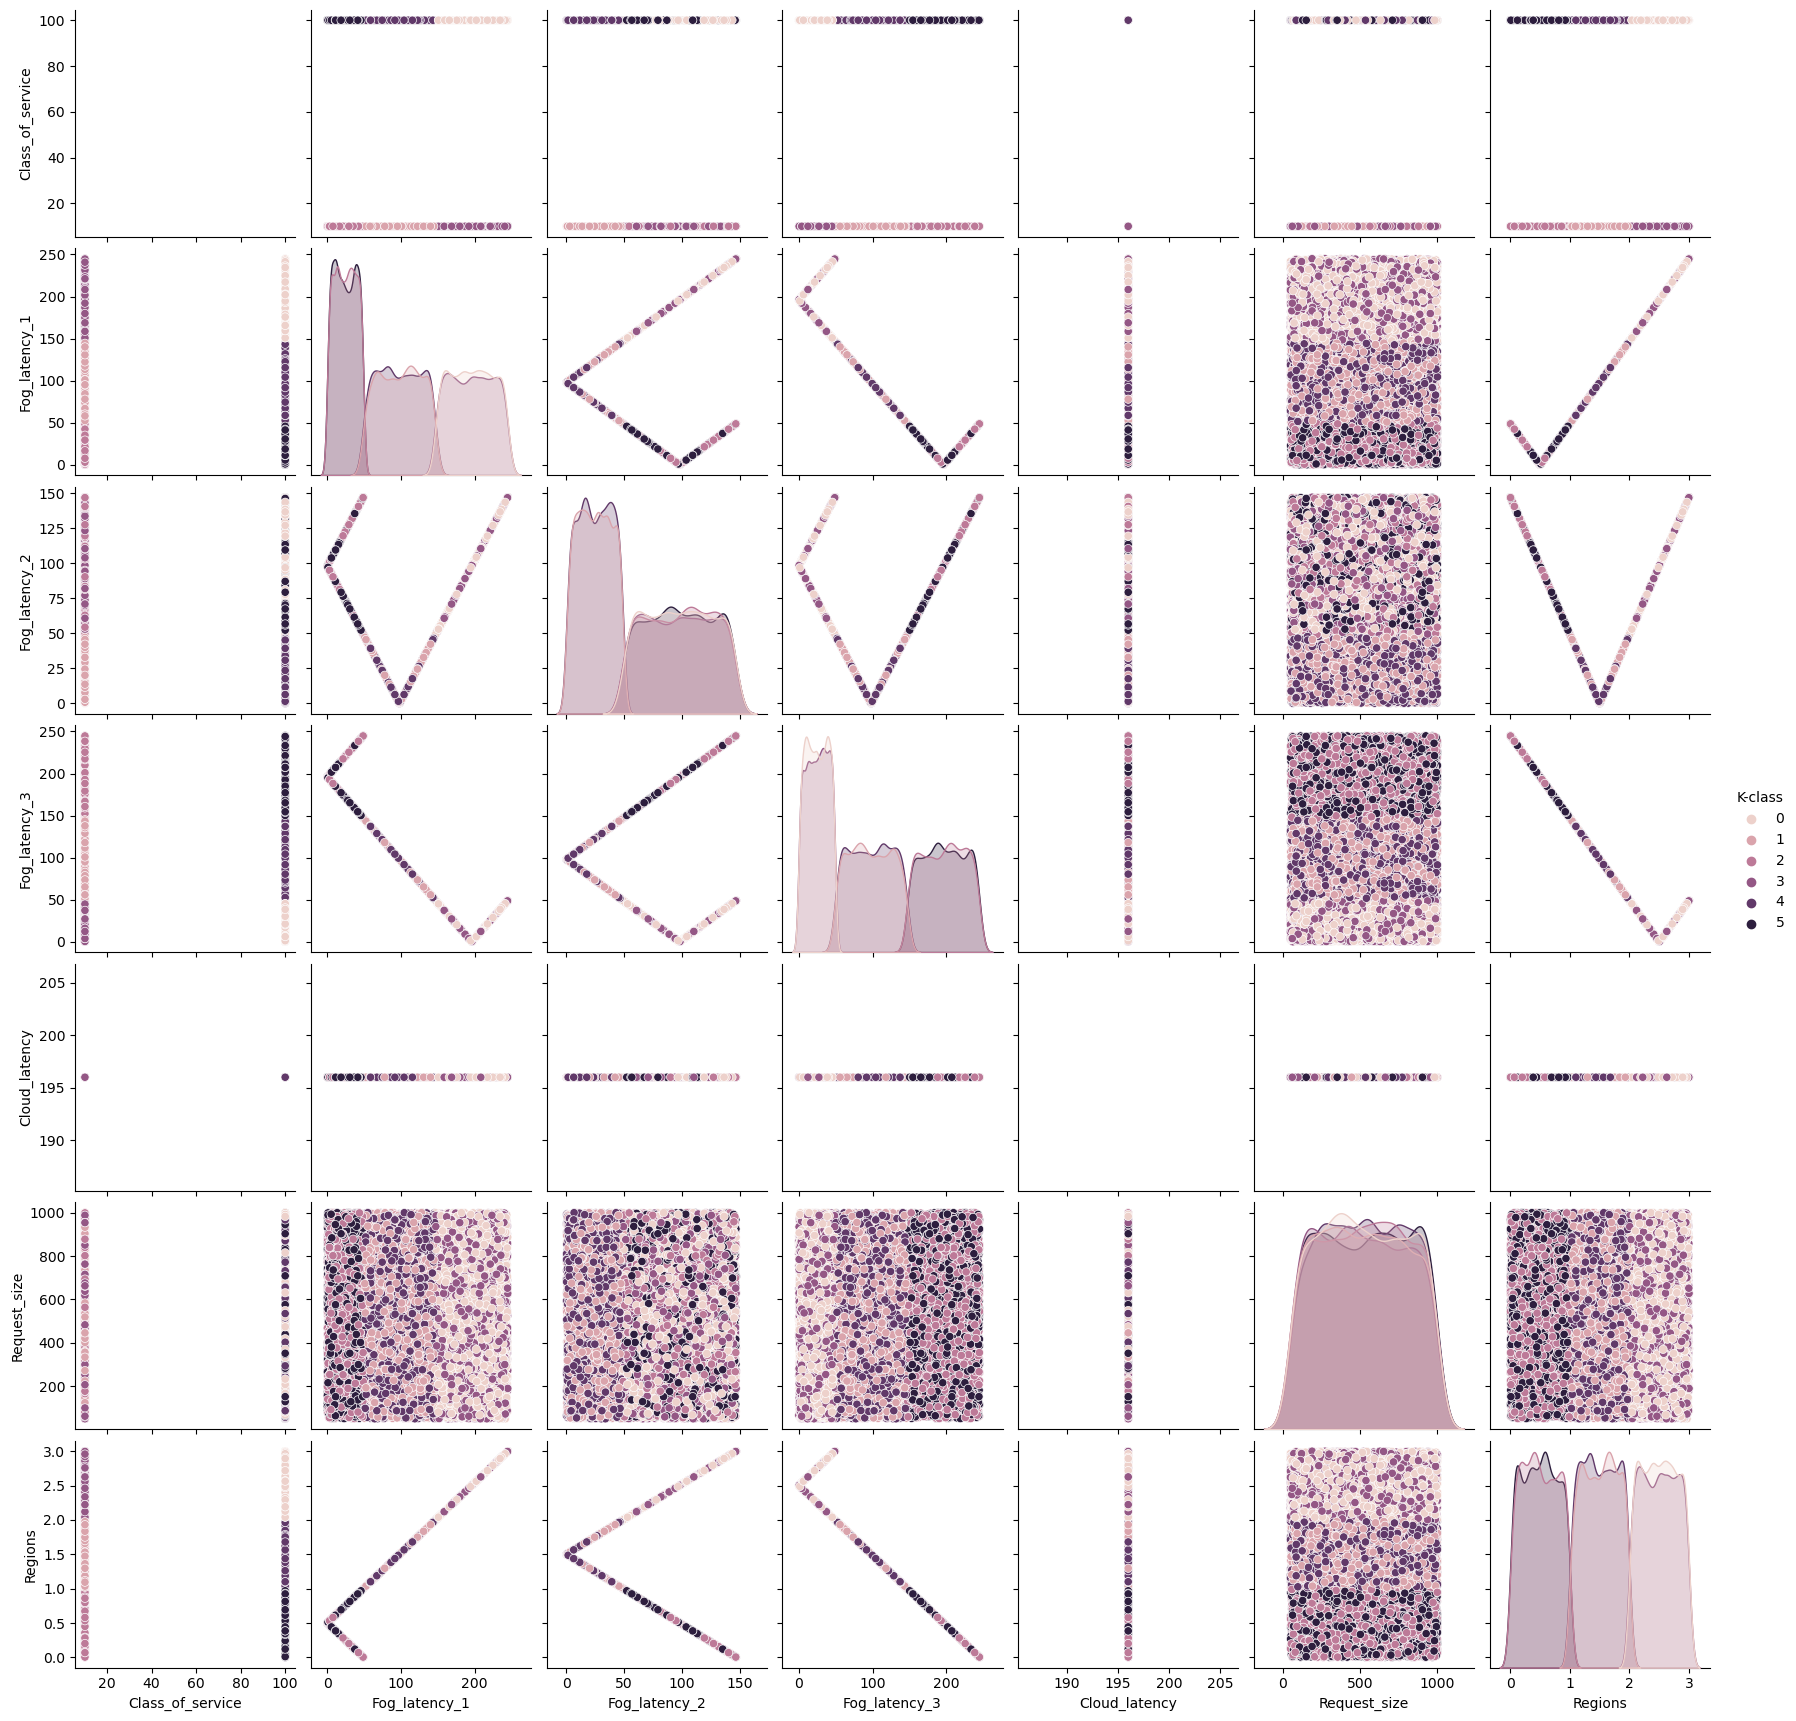

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = devicesDf.groupby('Hour')

#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
X = np.array(devicesDf.drop(['Device_id', 'Request_size'], axis = 1))


sum_of_squares = calculate_wcss(X)

n = optimal_number_of_clusters(sum_of_squares)

print(n)

#aplicação do kmeans
kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
kmeans.fit_predict(X)

kmeans.labels_
devicesDf['K-class'] = kmeans.labels_
devicesDf

sum_smallest_latency = 0

for index in range(len(devicesDf)):
    smallest_latency = min([devicesDf["Fog_latency_1"].iloc[index], devicesDf["Fog_latency_2"].iloc[index], devicesDf["Fog_latency_3"].iloc[index]])
    sum_smallest_latency += smallest_latency
    print(index, " = ", smallest_latency)

media_latency = sum_smallest_latency / devicesDf.shape[0]

print("Latencia média = ", media_latency)

sb.pairplot(devicesDf, hue="K-class")

<h1>ploting line graph standard and priority workload by time</h1>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  6
quantidade dispositivos standard =  12
Menor latencia media =  9.925798563405753
latencia média por prioridade =  140.59246523007243
Horário =  1


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  6
quantidade dispositivos prioritarios =  16
quantidade dispositivos standard =  20
Menor latencia media =  8.219164876659658
latencia média por prioridade =  117.10805376554852
Horário =  2


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  28
quantidade dispositivos standard =  42
Menor latencia media =  9.548933081709041
latencia média por prioridade =  127.14893308170906
Horário =  3


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  64
quantidade dispositivos standard =  63
Menor latencia media =  12.40712034781733
latencia média por prioridade =  109.63546680451029
Horário =  4


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  115
quantidade dispositivos standard =  101
Menor latencia media =  11.888630873119636
latencia média por prioridade =  103.53677902126778
Horário =  5


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  190
quantidade dispositivos standard =  155
Menor latencia media =  13.294912387181279
latencia média por prioridade =  101.35288340167406
Horário =  6


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  247
quantidade dispositivos standard =  271
Menor latencia media =  11.677149028461605
latencia média por prioridade =  114.21768956900219
Horário =  7


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  401
quantidade dispositivos standard =  330
Menor latencia media =  13.260353684098762
latencia média por prioridade =  101.74188583184161
Horário =  8


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  477
quantidade dispositivos standard =  491
Menor latencia media =  12.147337066456407
latencia média por prioridade =  111.56469243835731
Horário =  9


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  610
quantidade dispositivos standard =  595
Menor latencia media =  12.809864956320315
latencia média por prioridade =  109.58994794387218
Horário =  10


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  703
quantidade dispositivos standard =  705
Menor latencia media =  12.366996680941613
latencia média por prioridade =  110.50620122639617
Horário =  11


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  786
quantidade dispositivos standard =  761
Menor latencia media =  12.25134258953449
latencia média por prioridade =  108.66763218229464
Horário =  12


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  786
quantidade dispositivos standard =  810
Menor latencia media =  12.17957079749887
latencia média por prioridade =  111.65325500802528
Horário =  13


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  778
quantidade dispositivos standard =  769
Menor latencia media =  12.154267034233746
latencia média por prioridade =  109.58413128762736
Horário =  14


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  738
quantidade dispositivos standard =  670
Menor latencia media =  12.84312276655845
latencia média por prioridade =  106.11016822110383
Horário =  15


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  594
quantidade dispositivos standard =  611
Menor latencia media =  12.156349342138405
latencia média por prioridade =  111.53892195624638
Horário =  16


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  485
quantidade dispositivos standard =  483
Menor latencia media =  12.402958354158928
latencia média por prioridade =  110.20047901531605
Horário =  17


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  368
quantidade dispositivos standard =  363
Menor latencia media =  12.210847880331949
latencia média por prioridade =  109.540533242849
Horário =  18


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  268
quantidade dispositivos standard =  250
Menor latencia media =  12.897624433785596
latencia média por prioridade =  107.49221902838015
Horário =  19


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  163
quantidade dispositivos standard =  182
Menor latencia media =  11.55738465171315
latencia média por prioridade =  114.9544861009885
Horário =  20


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  107
quantidade dispositivos standard =  109
Menor latencia media =  11.614381241128058
latencia média por prioridade =  110.52178864853542
Horário =  21


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  74
quantidade dispositivos standard =  53
Menor latencia media =  15.527081020019885
latencia média por prioridade =  97.3223566105711
Horário =  22


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  4
quantidade dispositivos prioritarios =  37
quantidade dispositivos standard =  33
Menor latencia media =  12.319431506554004
latencia média por prioridade =  104.71943150655396
Horário =  23


c:\Users\mathe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Número ótimo de clusters =  5
quantidade dispositivos prioritarios =  24
quantidade dispositivos standard =  12
Menor latencia media =  16.121772247994798
latencia média por prioridade =  81.45510558132813


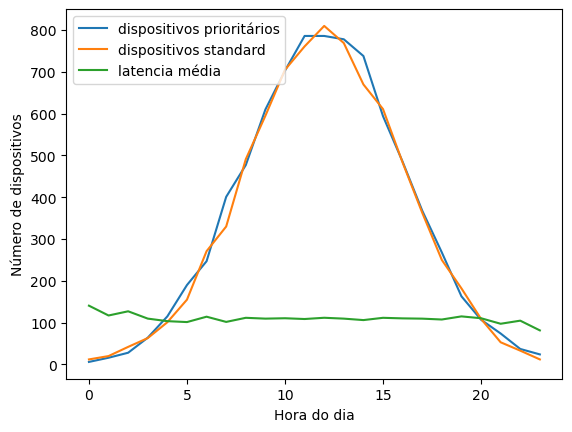

In [10]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans

list_of_devices = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        device.append(t['latency'][0])
        device.append(t['latency'][1])
        device.append(t['latency'][2])
        device.append(t['latency'][3])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service', 'Fog_latency_1', 'Fog_latency_2','Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])
    
df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
#Definição ótima da quantidade de clusters
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

#Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0

    for index in range(len(df_by_hour[str(i)])):
        if df_by_hour[str(i)]['Class_of_service'].iloc[index] == 100:
            smallest_latency = min([df_by_hour[str(i)]["Fog_latency_1"].iloc[index], df_by_hour[str(i)]["Fog_latency_2"].iloc[index], df_by_hour[str(i)]["Fog_latency_3"].iloc[index]])
            sum_smallest_latency += smallest_latency
            num_priority += 1
            latency_by_priority += smallest_latency
        else:
            num_standard += 1
            latency_by_priority += df_by_hour[str(i)]['Cloud_latency'].iloc[index]

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    media_smallest_latency = sum_smallest_latency / df_by_hour[str(i)].shape[0]
    X = np.array(df_by_hour[str(i)].drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

    sum_of_squares = calculate_wcss(X)
    n = optimal_number_of_clusters(sum_of_squares)

    print("Número ótimo de clusters = ", n)

    #aplicação do kmeans
    kmeans = KMeans(n_clusters=6, init= 'k-means++',n_init = 10, max_iter = 10000)
    kmeans.fit_predict(X)

    #kmeans.labels_
    df_by_hour[str(i)]['K-class'] = kmeans.labels_
    #devicesDf

    print("quantidade dispositivos prioritarios = ", num_priority)
    print("quantidade dispositivos standard = ", num_standard)

    print("Menor latencia media = ", media_smallest_latency)
    print("latencia média por prioridade = ", media_priority_latency)

    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)
    #sb.pairplot(df_by_hour[str(i)], hue="K-class")

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

## Function: alocation_by_priority<br>
Devices alocation based on priority of execution.<br>
Priority devices are connected to the fog nodes and standard devices are connected to the cloud processing node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [11]:
def alocation_by_priority(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if devices_regions[int(region)][index]["Class_of_service"] == 100 and len(processing_nodes[int(region)].connected_devices) < processing_nodes[int(region)].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_standard += 1
    
    return latency_by_priority, num_priority, num_standard

## Function: fog_first_alocation<br>
Fog first alocation aims to use all capacity of the fog nodes before starts to use the cloud processing node.<br>
Devices that are standard and are connected to the fog node can be relocated to the cloud if a priority user needs to processed in the fog node.

### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [12]:
def fog_first_alocation(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0
    
    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            fog_node_id = "Fog_latency_" + str(region+1)
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                # search for no_priority device connected to fog node
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].connected_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_standard += 1

    return latency_by_priority, num_priority, num_standard

## Function: alocation_cloud_only<br>
Cloud only aims to use only the processing capacity of the cloud node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [13]:
def alocation_cloud_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[-1].connected_devices) < processing_nodes[-1].device_capacity:
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"]
                num_priority += 1
            else:
                for device_index in range(len(processing_nodes[-1].connected_devices)):
                    if processing_nodes[-1].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[-1].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[-1].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[-1].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[-1].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[-1].connected_devices.append(
                    devices_regions[region][index])
                latency_by_priority += devices_regions[region][index]["Cloud_latency"] + (len(processing_nodes[-1].queue_devices) * 100)
                num_standard += 1
    
    return latency_by_priority, num_priority, num_standard

## Function: alocation_fog_only<br>
Fog only aims to use only the processing capacity of the fog node not caring about its processing capacity. If the demand is greater, devices are alocated to a processing queue.
### Input:
> devices_regions : list [regions][devices]<br> 
> processing_nodes : list [fog and cloud nodes]<br>

### Return:
> latency_by_priority : float [all latency values from that specific alocation]<br>
> num_priority : int [number of priority devices]<br>
> num_standard : int [number of standard devices]<br>

In [14]:
def alocation_fog_only(devices_regions, processing_nodes):
    latency_by_priority = 0
    num_priority = 0
    num_standard = 0

    for region in range(len(devices_regions)):
        for index in range(len(devices_regions[region])):
            # verify the priority and the availability of the fog node
            if len(processing_nodes[region].connected_devices) < processing_nodes[region].device_capacity:
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id]
                num_priority += 1
            else:
                for device_index in range(len(processing_nodes[region].connected_devices)):
                    if processing_nodes[region].connected_devices[device_index]["Class_of_service"] == 10:
                        no_priority_device = processing_nodes[region].connected_devices[device_index]
                        # disconnect device from fog node
                        processing_nodes[region].connected_devices.pop(device_index)
                        # connect no-priority device on cloud node    
                        processing_nodes[region].queue_devices.append(
                            no_priority_device)
                        # connect new priority device on the fog node
                        processing_nodes[region].connected_devices.append(devices_regions[region][index])

                        break
                # if no no-priority device in found, just connect to the cloud
                processing_nodes[region].connected_devices.append(
                    devices_regions[region][index])
                fog_node_id = "Fog_latency_" + str(region+1)
                latency_by_priority += devices_regions[region][index][fog_node_id] + (len(processing_nodes[region].queue_devices) * 100)

                num_standard += 1
    
    return latency_by_priority, num_priority, num_standard

In [15]:
from cProfile import label
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sb
import json
import math
from sklearn.cluster import KMeans
import utilities
import time
import timeit

list_of_devices = []

latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

devices_regions_by_hour = []

f = open('workload.json')
data = json.load(f)

for i in data:
    for t in data[i]:

        device = []
        device.append(i)
        device.append(t['device_id'])
        device.append(10 if t['class_of_service'] == 'standard' else 100)
        for fog_latency in range(len(t['latency'])):
            device.append(t['latency'][fog_latency])
        device.append(t['request_size'])
        device.append(t['region'])

        list_of_devices.append(device)

devicesDf = pd.DataFrame(list_of_devices, columns=['Hour', 'Device_id', 'Class_of_service',
                         'Fog_latency_1', 'Fog_latency_2', 'Fog_latency_3', 'Cloud_latency', 'Request_size', 'Regions'])

df_by_hour = dict(tuple(devicesDf.groupby('Hour')))
print(list(range(len(df_by_hour))))
# Definição ótima da quantidade de clusters


def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = math.sqrt(abs((y2 - y1)*2 + (x2 - x1)*2))
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2


def calculate_wcss(data):
    wcss = []
    for n in range(1, 16):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)

    return wcss

# Cada coluna 'dropada' é uma coluna que não vai entrar no kmeans
#X = np.array(devicesDf.drop(['Device_id', 'Hour', 'Request_size'], axis = 1))

# loop by hour of the workload database
for i in range(len(df_by_hour)):
    print("Horário = ", i)
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)

    # removing some not used columns
    X = np.array(df_by_hour[str(i)].drop(
        ['Device_id', 'Hour', 'Request_size'], axis=1))

    #sum_of_squares = calculate_wcss(X)
    #n = optimal_number_of_clusters(sum_of_squares)

    # clustering by hour
    kmeans = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=10000)
    kmeans.fit_predict(X)

    # add cluster label to each device
    df_by_hour[str(i)]['K-class'] = kmeans.labels_

    centers = np.array(kmeans.cluster_centers_)

    # get region centroid for each cluster and put it on a list with the cluster label
    # gonna be used to define the processing node each device will go depending of the cluster they're in
    ordered_clusters = []
    for cluster_index in range(len(centers)):
        # hardcoded -1 - last element on the centers is the centroid of the region
        ordered_clusters.append((centers[cluster_index][-1], cluster_index))

    # sort list of centroid and label of each cluster by the centroid
    ordered_clusters.sort()
    print(ordered_clusters)

    # list of devices for each region
    devices_regions = []
    devices_region_1 = []
    devices_region_2 = []
    devices_region_3 = []

    # loop through all devices in this hour
    # and stores than in its own region to be connected
    for devices in range(len(df_by_hour[str(i)])):
        device = df_by_hour[str(i)]['K-class'].iloc[devices]

        # ordered_cluster getting the index of the k-class refering to each region
        if device == ordered_clusters[0][1] or device == ordered_clusters[1][1]:
            devices_region_1.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[2][1] or device == ordered_clusters[3][1]:
            devices_region_2.append(df_by_hour[str(i)].iloc[devices])
        elif device == ordered_clusters[4][1] or device == ordered_clusters[5][1]:
            devices_region_3.append(df_by_hour[str(i)].iloc[devices])

    devices_regions.append(devices_region_1)
    devices_regions.append(devices_region_2)
    devices_regions.append(devices_region_3)

    devices_regions_by_hour.append(devices_regions)

    #######################################################
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ######################################################
    #latency_by_priority, num_priority, num_standard = alocation_by_priority(devices_regions, processing_nodes)
    #result = timeit.timeit(stmt='alocation_by_priority(devices_regions, processing_nodes)', globals=globals(), number=1)
    
    #########################
    # ALOCATION - FOG FIRST #
    #########################
    #latency_by_priority, num_priority, num_standard = fog_first_alocation(devices_regions, processing_nodes)
    #result = timeit.timeit(stmt='fog_first_alocation(devices_regions, processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    ##########################
    # ALOCATION - ONLY CLOUD #
    ##########################
    #latency_by_priority, num_priority, num_standard = alocation_cloud_only(devices_regions, processing_nodes)
    #result = timeit.timeit(stmt='alocation_cloud_only(devices_regions, processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    ########################
    # ALOCATION - ONLY FOG #
    ########################
    #latency_by_priority, num_priority, num_standard = alocation_fog_only(devices_regions, processing_nodes)
    #result = timeit.timeit(stmt='alocation_fog_only(devices_regions, processing_nodes)', globals=globals(), number=1)
    #print("Alocation process time: ", result)

    #media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    #print("Latencia media: ", media_priority_latency)
    #latency_list_by_priority.append(media_priority_latency)
    #num_priority_by_hour.append(num_priority)
    #num_standard_by_hour.append(num_standard)

#pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
#pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
#pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
#pl.xlabel("Hora do dia")
#pl.ylabel("Número de dispositivos")
#pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
#pl.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Horário =  0
[(0.2618843389144818, 1), (0.8561956225394924, 3), (1.464727612007937, 0), (1.8730654612030249, 5), (2.2723184790253708, 4), (2.505107169482498, 2)]
Horário =  1
[(0.47764292254065643, 3), (1.031416056497854, 1), (1.6230193100304344, 2), (1.9106881582090312, 5), (2.5379879981450895, 4), (2.662421357454436, 0)]
Horário =  2
[(0.44223472651534257, 4), (0.7434172552931334, 0), (1.3376289285297465, 5), (1.6864283288496043, 3), (2.3678818374183055, 2), (2.643895687184999, 1)]
Horário =  3
[(0.5567691019397679, 3), (0.6360396573247074, 0), (1.4304238935925844, 2), (1.529835553112576, 5), (2.476634292931495, 4), (2.5032828845302952, 1)]
Horário =  4
[(0.42903666172890986, 3), (0.5098594085339865, 4), (1.5355808436966791, 2), (1.6050622706531417, 0), (2.4757554870817904, 5), (2.602444019249825, 1)]
Horário =  5
[(0.46838023778013715, 2), (0.48885295846519816, 5), (1.5346727006758976, 3), (1.5467

Alocation process time:  0.0003885999999511114
Latencia media:  140.85225100309924
Alocation process time:  0.0006588000001102046
Latencia media:  117.10805376554855
Alocation process time:  0.0011692000000493863
Latencia media:  127.17811866260537
Alocation process time:  0.0020766999998613755
Latencia media:  109.83937041745456
Alocation process time:  0.0040458000000853644
Latencia media:  103.53677902126782
Alocation process time:  0.005842499999971551
Latencia media:  101.35549377702384
Alocation process time:  0.008546599999817772
Latencia media:  114.22489458500408
Alocation process time:  0.011316599999872778
Latencia media:  101.83120071555584
Alocation process time:  0.011880100000098537
Latencia media:  111.57093727007693
Alocation process time:  0.01364530000000741
Latencia media:  111.3416468623777
Alocation process time:  0.018541200000072422
Latencia media:  123.04511548520465
Alocation process time:  0.017636199999969904
Latencia media:  129.27610113374274
Alocation pro

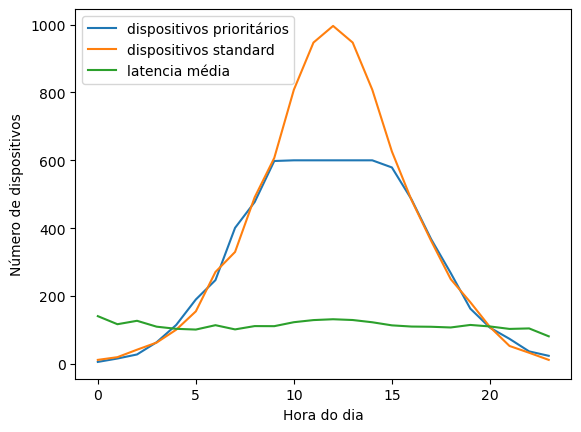

In [16]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []
#print(devices_regions)

for i in range(len(df_by_hour)):
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #######################################################
    # alocation of the devices in each region of fog node
    # ALOCATION BY PRIORITY #
    ######################################################
    latency_by_priority, num_priority, num_standard = alocation_by_priority(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='alocation_by_priority(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

Alocation process time:  0.0002612999999200838
Latencia media:  24.71042908946799
Alocation process time:  0.00025009999990288634
Latencia media:  28.335715536932454
Alocation process time:  0.0005400999998528278
Latencia media:  26.462241473725598
Alocation process time:  0.000817900000129157
Latencia media:  25.747902372747824
Alocation process time:  0.0019013000000995817
Latencia media:  23.784409478718707
Alocation process time:  0.017261499999904117
Latencia media:  23.539608148532604
Alocation process time:  0.1645734999999604
Latencia media:  24.130709853133034
Alocation process time:  0.6895512000000963
Latencia media:  55.06466691808268
Alocation process time:  1.0957997000000432
Latencia media:  89.33710507821708
Alocation process time:  1.428835700000036
Latencia media:  110.91863910755421
Alocation process time:  1.5696257999998124
Latencia media:  123.30111430525432
Alocation process time:  1.7485618000000613
Latencia media:  129.30258514564403
Alocation process time:  1.

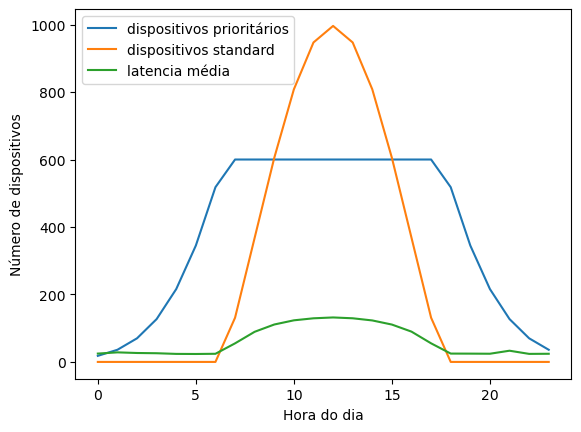

In [17]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    #########################
    # ALOCATION - FOG FIRST #
    #########################
    latency_by_priority, num_priority, num_standard = fog_first_alocation(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='fog_first_alocation(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

Alocation process time:  0.000143900000011854
Latencia media:  196.0
Alocation process time:  0.00022439999997914128
Latencia media:  196.0
Alocation process time:  0.0004508999998051877
Latencia media:  196.0
Alocation process time:  0.0014012999999977183
Latencia media:  196.0
Alocation process time:  0.0023588999999901716
Latencia media:  196.0
Alocation process time:  0.002322000000049229
Latencia media:  196.0
Alocation process time:  0.0071817999998984305
Latencia media:  196.0
Alocation process time:  0.747985799999924
Latencia media:  196.0
Alocation process time:  2.572568799999999
Latencia media:  196.0
Alocation process time:  5.8482016000000385
Latencia media:  1948.2821576763486
Alocation process time:  9.004807699999901
Latencia media:  6121.852272727273
Alocation process time:  12.365162699999928
Latencia media:  9884.299935358758
Alocation process time:  12.118313899999976
Latencia media:  11342.992481203008
Alocation process time:  11.714541599999848
Latencia media:  9

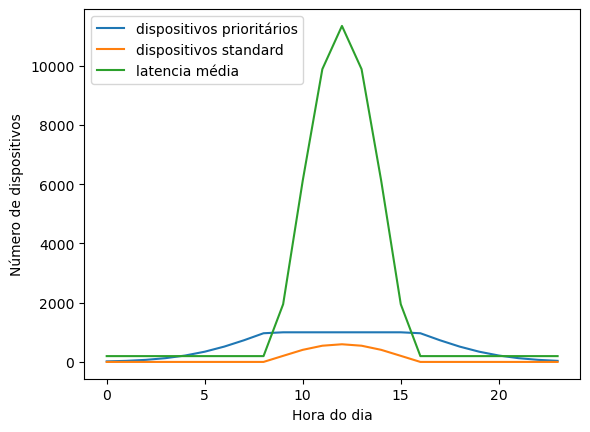

In [18]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ##########################
    # ALOCATION - ONLY CLOUD #
    ##########################
    latency_by_priority, num_priority, num_standard = alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='alocation_cloud_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)

    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()

Alocation process time:  0.00021749999996245606
Latencia media:  24.71042908946799
Alocation process time:  0.00024299999995491817
Latencia media:  28.335715536932454
Alocation process time:  0.00045090000003256137
Latencia media:  26.462241473725598
Alocation process time:  0.0007940000000417058
Latencia media:  25.747902372747824
Alocation process time:  0.0020770000000993605
Latencia media:  23.784409478718707
Alocation process time:  0.015959000000066226
Latencia media:  23.539608148532604
Alocation process time:  0.16247599999996964
Latencia media:  24.130709853133034
Alocation process time:  0.7625256000001173
Latencia media:  434.17927064177655
Alocation process time:  1.5877883999999085
Latencia media:  2379.2390254937964
Alocation process time:  2.936497099999997
Latencia media:  5126.165181527139
Alocation process time:  4.09251119999999
Latencia media:  7838.796017583424
Alocation process time:  5.223332100000107
Latencia media:  9807.696337538333
Alocation process time:  5.

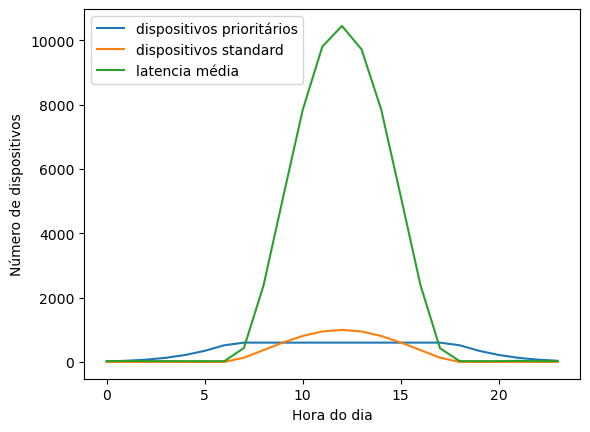

In [19]:
latency_list_by_priority = []
num_priority_by_hour = []
num_standard_by_hour = []

for i in range(len(df_by_hour)):
    sum_smallest_latency = 0
    num_priority = 0
    num_standard = 0
    latency_by_priority = 0
    processing_nodes = utilities.instantiate_processing_nodes(1, 3)
    ########################
    # ALOCATION - ONLY FOG #
    ########################
    latency_by_priority, num_priority, num_standard = alocation_fog_only(devices_regions_by_hour[i], processing_nodes)
    result = timeit.timeit(stmt='alocation_fog_only(devices_regions_by_hour[i], processing_nodes)', globals=globals(), number=1)
    print("Alocation process time: ", result)


    media_priority_latency = latency_by_priority / df_by_hour[str(i)].shape[0]
    
    print("Latencia media: ", media_priority_latency)
    latency_list_by_priority.append(media_priority_latency)
    num_priority_by_hour.append(num_priority)
    num_standard_by_hour.append(num_standard)

pl.plot(list(range(len(df_by_hour))), num_priority_by_hour, label="dispositivos prioritários")
pl.plot(list(range(len(df_by_hour))), num_standard_by_hour, label="dispositivos standard")
pl.plot(list(range(len(df_by_hour))), latency_list_by_priority, label="latencia média")
pl.xlabel("Hora do dia")
pl.ylabel("Número de dispositivos")
pl.legend(['dispositivos prioritários', 'dispositivos standard', 'latencia média'])
pl.show()